In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import STAGATE
import scanpy as sc

In [4]:
section_id = 'GSM5764423'

In [5]:
file = ''
adata = sc.read_visium(file, count_file=r'filtered_feature_bc_matrix.h5',load_images=True)
adata.var_names_make_unique()

In [6]:
adata

AnnData object with n_obs × n_vars = 1708 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



------Calculating spatial graph...
The graph contains 0 edges, 1708 cells.
0.0000 neighbors per cell on average.


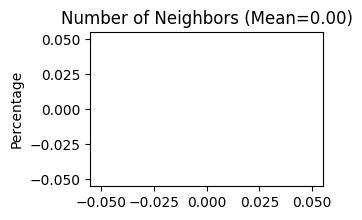

In [8]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [9]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1708, 3000)


100%|██████████| 500/500 [01:25<00:00,  5.87it/s]


In [10]:
r"C:\Users\KARAN\AppData\Local\R\win-library\4.3\spatialLIBD\data"

'C:\\Users\\KARAN\\AppData\\Local\\R\\win-library\\4.3\\spatialLIBD\\data'

In [11]:
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.3.0"
os.environ['R_USER'] = r"C:\Users\KARAN\anaconda3\envs\STAGATE_PT\Lib\site-packages\rpy2"


In [20]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)

fitting ...
  |======================================================================| 100%


In [21]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


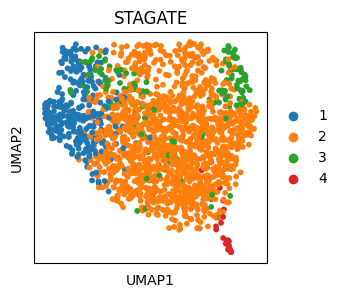

In [22]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

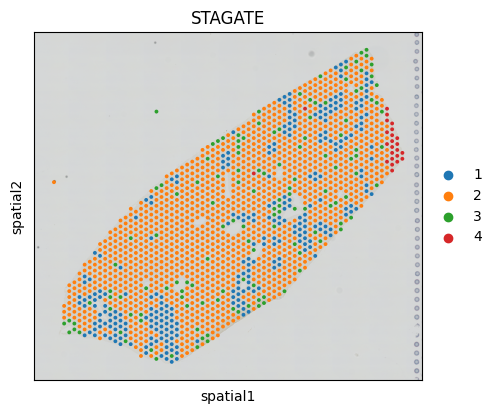

In [23]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])